In [17]:
import pickle 
import os
from datetime import datetime,timezone,timedelta

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot

In [18]:
def dict_to_matrix(data_dict):
    data_dict_copy = data_dict.copy()

    y_max_ele = list(data_dict_copy.keys())
    x_t_r = list(data_dict_copy[y_max_ele[0]])
    y_max_ele.insert(0,0)
    x_t_r.insert(0,0)
    
    
    data2 = np.zeros((5,5))
    data3 = np.zeros((5,5))
    for i,ele in enumerate(data_dict):
        for j,t_range in enumerate(data_dict[ele]):
            data2[i,j]= data_dict[ele][t_range][2]
            data3[i,j]= data_dict[ele][t_range][3]
    return {'x_tick':x_t_r,'y_tick':y_max_ele,'data':[data2,data3]}

def analyze_accuracy(ts_dict):
    std_dict = {}
    point_count_dict = {}
    for ele in ts_dict:
        std_dict[ele] = {}
        point_count_dict[ele] = {}
        for t_range in ts_dict[ele]:
            std_dict[ele][t_range] = {}
            point_count_dict[ele][t_range] = {}
            
            point_count_dict[ele][t_range][2] = len(list(ts_dict[ele][t_range][2].values()))
            point_count_dict[ele][t_range][3] = len(list(ts_dict[ele][t_range][3].values()))

            std_dict[ele][t_range][2] = np.std(list(ts_dict[ele][t_range][2].values()))
            std_dict[ele][t_range][3] = np.std(list(ts_dict[ele][t_range][3].values()))

    std_info = dict_to_matrix(std_dict)
    count_info = dict_to_matrix(point_count_dict)
    return (std_info,count_info)

In [19]:
with open('../data/generated_data/20220907.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

(std_0907,count_0907) = analyze_accuracy(ts_dict)

C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\2989788132.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_0907['x_tick'])
C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\2989788132.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_0907['y_tick'])


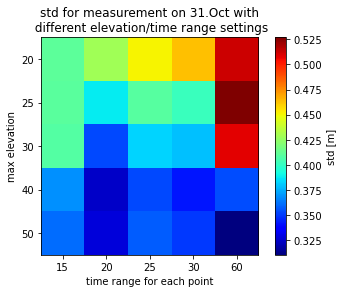

In [27]:
fig,ax = plt.subplots()
im = ax.imshow(std_0907['data'][0],cmap='jet')
ax.set_xticklabels(std_0907['x_tick'])
ax.set_yticklabels(std_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')

C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\3855837085.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_0907['x_tick'])
C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\3855837085.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_0907['y_tick'])


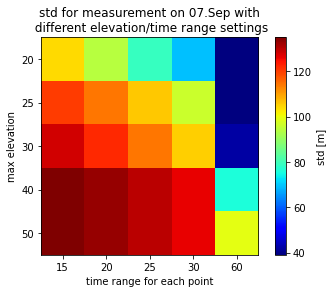

In [29]:
fig,ax = plt.subplots()
im = ax.imshow(count_0907['data'][0],cmap='jet')
ax.set_xticklabels(count_0907['x_tick'])
ax.set_yticklabels(count_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')

C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\4282441022.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(std_0907['x_tick'])
C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\4282441022.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(std_0907['y_tick'])


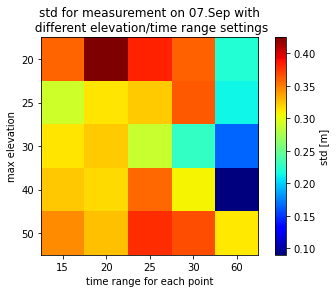

In [28]:
fig,ax = plt.subplots()
im = ax.imshow(std_0907['data'][1],cmap='jet')
ax.set_xticklabels(std_0907['x_tick'])
ax.set_yticklabels(std_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')

C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\1144778343.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(count_0907['x_tick'])
C:\Users\ziqin\AppData\Local\Temp\ipykernel_8084\1144778343.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(count_0907['y_tick'])


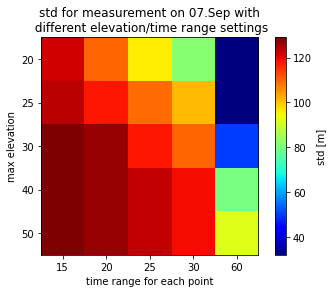

In [30]:
fig,ax = plt.subplots()
im = ax.imshow(count_0907['data'][1],cmap='jet')
ax.set_xticklabels(count_0907['x_tick'])
ax.set_yticklabels(count_0907['y_tick'])
ax.set_ylabel('max elevation')
ax.set_xlabel('time range for each point')
ax.set_title('std for measurement on 07.Sep with\n different elevation/time range settings')

cbar =fig.colorbar(im)
cbar.set_label('std [m]')